### House Prices - Advanced Regression Techniques
### Import Libraries

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats

# Split arrays into random train and test subsets
from sklearn.model_selection import train_test_split

# Apply different transformations to each type of data
from sklearn.compose import make_column_transformer, ColumnTransformer

# Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.kernel_ridge import KernelRidge

# Metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Pipeline
from sklearn.pipeline import Pipeline, make_pipeline

# Handling missing values in dataset
from sklearn.impute import SimpleImputer

# Preprocessing
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, OneHotEncoder

pd.set_option("display.max_rows", None)

### Data Acquisition

In [19]:
df_train = pd.read_csv("/home/felipe/Documents/tier0/kaggle/house-prices-advanced-regression-techniques/train.csv")
df_test = pd.read_csv("/home/felipe/Documents/tier0/kaggle/house-prices-advanced-regression-techniques/test.csv")

### Data Cleaning

In [20]:
df_train = df_train.convert_dtypes()
df_test = df_test.convert_dtypes()

#### Missing values

In [21]:
# Fill <NA> with "No"
df_train["Alley"].fillna("No", inplace=True)
df_test["Alley"].fillna("No", inplace=True)

df_train["PoolQC"].fillna("No", inplace=True)
df_test["PoolQC"].fillna("No", inplace=True)

df_train["Fence"].fillna("No", inplace=True)
df_test["Fence"].fillna("No", inplace=True)

df_train["FireplaceQu"].fillna("No", inplace=True)
df_test["FireplaceQu"].fillna("No", inplace=True)

df_train["MiscFeature"].fillna("No", inplace=True)
df_test["MiscFeature"].fillna("No", inplace=True)

df_train["MasVnrArea"].fillna(0, inplace=True)
df_test["MasVnrArea"].fillna(0, inplace=True)

df_train["LotFrontage"].fillna(0, inplace=True)
df_test["LotFrontage"].fillna(0, inplace=True)

df_train["GarageFinish"].fillna("No", inplace=True)
df_test["GarageFinish"].fillna("No", inplace=True)

df_train["GarageType"].fillna("No", inplace=True)
df_test["GarageType"].fillna("No", inplace=True)

df_train["GarageQual"].fillna("No", inplace=True)
df_test["GarageQual"].fillna("No", inplace=True)

df_train["GarageCond"].fillna("No", inplace=True)
df_test["GarageCond"].fillna("No", inplace=True)

df_train["BsmtExposure"].fillna("No", inplace=True)
df_test["BsmtExposure"].fillna("No", inplace=True)

df_train["BsmtFinType2"].fillna("Unf", inplace=True)
df_test["BsmtFinType2"].fillna("Unf", inplace=True)

df_train["BsmtFinType1"].fillna("No", inplace=True)
df_test["BsmtFinType1"].fillna("No", inplace=True)

df_train["BsmtCond"].fillna("No", inplace=True)
df_test["BsmtCond"].fillna("No", inplace=True)

df_train["BsmtQual"].fillna("No", inplace=True)
df_test["BsmtQual"].fillna("No", inplace=True)

df_train["MasVnrType"].fillna("No", inplace=True)
df_test["MasVnrType"].fillna("No", inplace=True)

df_train["Electrical"].fillna("SBrkr", inplace=True)
df_test["Electrical"].fillna("SBrkr", inplace=True)

print(df_train.tail(), df_test.tail())

        Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
1455  1456          60       RL           62     7917   Pave    No      Reg   
1456  1457          20       RL           85    13175   Pave    No      Reg   
1457  1458          70       RL           66     9042   Pave    No      Reg   
1458  1459          20       RL           68     9717   Pave    No      Reg   
1459  1460          20       RL           75     9937   Pave    No      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
1455         Lvl    AllPub  ...        0     No     No          No       0   
1456         Lvl    AllPub  ...        0     No  MnPrv          No       0   
1457         Lvl    AllPub  ...        0     No  GdPrv        Shed    2500   
1458         Lvl    AllPub  ...        0     No     No          No       0   
1459         Lvl    AllPub  ...        0     No     No          No       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  

### EDA (Exploratory Data Analysis)

##### Train

In [22]:
print(df_train.columns)
print(df_train.info())
print(df_train.isnull().sum().sort_values(ascending=False))

# Check if the all of the columns have 0 null values
print(sum(df_train.isnull().sum() != 0)) 

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [23]:
print(df_train["MSZoning"].unique())


<StringArray>
['RL', 'RM', 'C (all)', 'FV', 'RH']
Length: 5, dtype: string


#### Skew

Skew: 1.8828757597682129


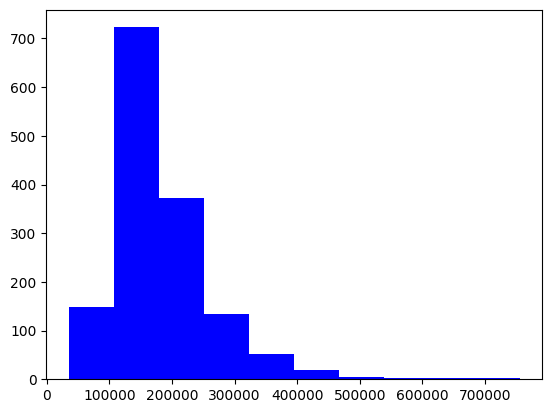

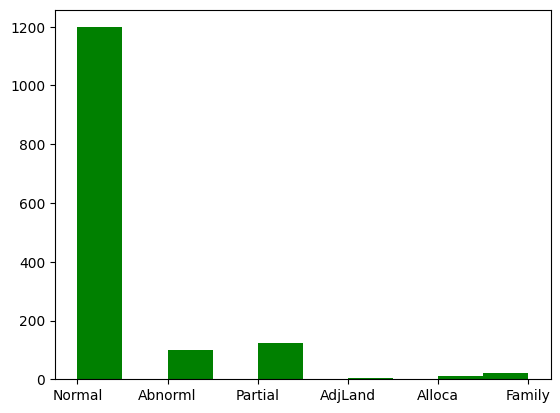

In [24]:
print(f"Skew: {df_train['SalePrice'].skew()}")
plt.hist(df_train["SalePrice"], color="blue")
plt.show()

plt.hist(df_train["SaleCondition"], color="green")
plt.show()

##### Test

In [25]:
print(df_test.columns)
print(df_test.info())
print(df_test.isnull().sum().sort_values(ascending=False))

# Check if the all of the columns have 0 null values
print(sum(df_test.isnull().sum() != 0))

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

#### Data Preprocessing
#### One-Hot Encoding

In [26]:
def encode(x): return 1 if x == "Partial" else 0
df_train["encode_condition"] = df_train["SaleCondition"].apply(encode)
df_test["encode_condition"] = df_train["SaleCondition"].apply(encode)

In [27]:
df_train.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,encode_condition
1455,1456,60,RL,62,7917,Pave,No,Reg,Lvl,AllPub,...,No,No,No,0,8,2007,WD,Normal,175000,0
1456,1457,20,RL,85,13175,Pave,No,Reg,Lvl,AllPub,...,No,MnPrv,No,0,2,2010,WD,Normal,210000,0
1457,1458,70,RL,66,9042,Pave,No,Reg,Lvl,AllPub,...,No,GdPrv,Shed,2500,5,2010,WD,Normal,266500,0
1458,1459,20,RL,68,9717,Pave,No,Reg,Lvl,AllPub,...,No,No,No,0,4,2010,WD,Normal,142125,0
1459,1460,20,RL,75,9937,Pave,No,Reg,Lvl,AllPub,...,No,No,No,0,6,2008,WD,Normal,147500,0


#### Feature Engineering

In [28]:
df_train["house_age"] = df_train["YrSold"] - df_train["YearBuilt"]
df_test["house_age"] = df_test["YrSold"] - df_test["YearBuilt"]

df_train["house_remodelage"] = df_train["YrSold"] - df_train["YearRemodAdd"]
df_test["house_remodelage"] = df_test["YrSold"] - df_test["YearRemodAdd"]

df_train["total_area"] = df_train["GrLivArea"] + df_train["TotalBsmtSF"]
df_test["total_area"] = df_test["GrLivArea"] + df_test["TotalBsmtSF"]

df_test.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,encode_condition,house_age,house_remodelage,total_area
1454,2915,160,RM,21,1936,Pave,No,Reg,Lvl,AllPub,...,No,0,6,2006,WD,Normal,0,36,36,1638
1455,2916,160,RM,21,1894,Pave,No,Reg,Lvl,AllPub,...,No,0,4,2006,WD,Abnorml,0,36,36,1638
1456,2917,20,RL,160,20000,Pave,No,Reg,Lvl,AllPub,...,No,0,9,2006,WD,Abnorml,0,46,10,2448
1457,2918,85,RL,62,10441,Pave,No,Reg,Lvl,AllPub,...,Shed,700,7,2006,WD,Normal,0,14,14,1882
1458,2919,60,RL,74,9627,Pave,No,Reg,Lvl,AllPub,...,No,0,11,2006,WD,Normal,0,13,12,2996


##### Filtering the dataframes (train and test)

In [29]:
df_train = df_train.drop(columns=["Id", "YrSold", "YearBuilt", "YearRemodAdd", "GrLivArea", "TotalBsmtSF"])
df_test = df_test.drop(columns=["Id", "YrSold", "YearBuilt", "YearRemodAdd", "GrLivArea", "TotalBsmtSF"])

##### Correlation Matrix

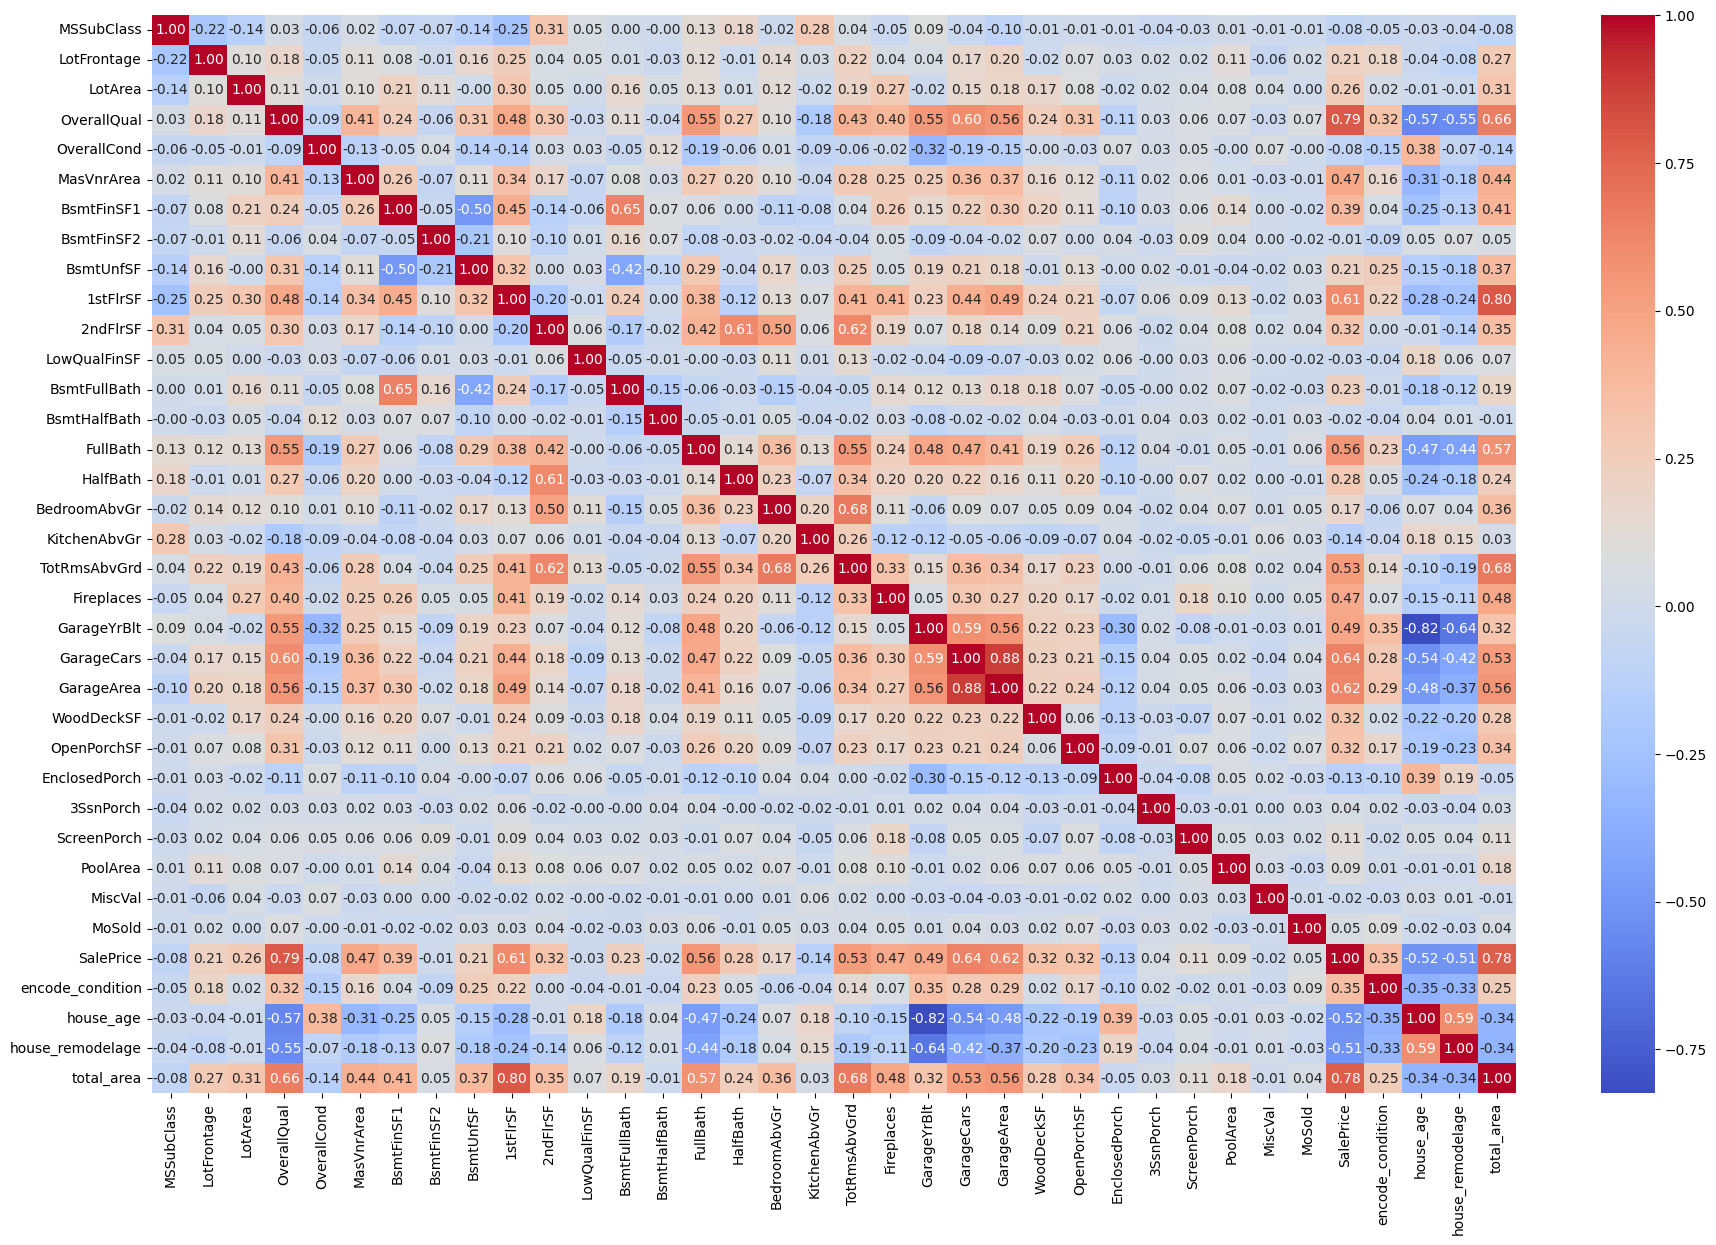

In [30]:
plt.figure(figsize=(22, 14))
sns.heatmap(df_train.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.show()

##### Distribution Sale Price

<AxesSubplot:xlabel='SalePrice', ylabel='Count'>

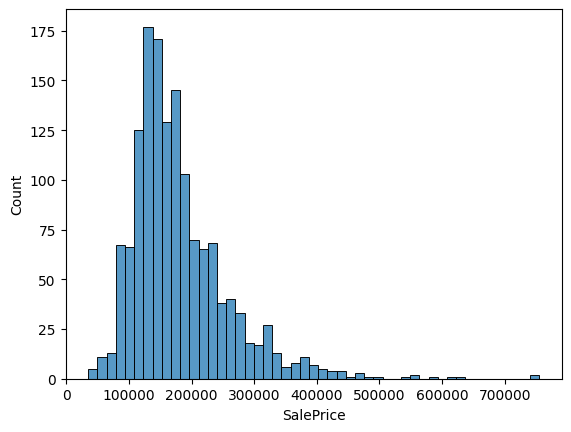

In [31]:
sns.histplot(df_train, x=df_train["SalePrice"])

##### Distribution Sale Price with Natural Logarithm Transformation
###### The natural logarithm of 1 plus the input array, which is useful for handling zero values and improving the distribution of the data. This transformation can help stabilize variance and make the data more normally distributed, which can be beneficial for many statistical models and machine learning algorithms.

<AxesSubplot:xlabel='SalePrice', ylabel='Count'>

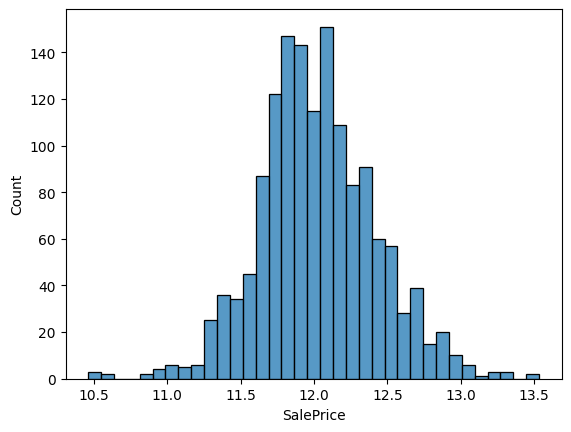

In [32]:
sns.histplot(df_train, x=np.log1p(df_train["SalePrice"]))

In [34]:
num_cols = df_train.drop("SalePrice")
num_cols.describe

MSSubClass           Int64
MSZoning            string
LotFrontage          Int64
LotArea              Int64
Street              string
Alley               string
LotShape            string
LandContour         string
Utilities           string
LotConfig           string
LandSlope           string
Neighborhood        string
Condition1          string
Condition2          string
BldgType            string
HouseStyle          string
OverallQual          Int64
OverallCond          Int64
RoofStyle           string
RoofMatl            string
Exterior1st         string
Exterior2nd         string
MasVnrType          string
MasVnrArea           Int64
ExterQual           string
ExterCond           string
Foundation          string
BsmtQual            string
BsmtCond            string
BsmtExposure        string
BsmtFinType1        string
BsmtFinSF1           Int64
BsmtFinType2        string
BsmtFinSF2           Int64
BsmtUnfSF            Int64
Heating             string
HeatingQC           string
C

#### Model

In [ ]:
X = df_train.drop("SalePrice", axis=1)
y = df_train["SalePrice"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Create an instance of LinearRegression
lr = LinearRegression()

# Fit the model on the training data
lr.fit(X_train, y_train)

# Make predictions on the test data
y_prediction = lr.predict(X_test)

# Print the predictions
print("Predictions:", y_prediction)

# Print the metrics
print("mean_absolute_error:", mean_absolute_error(y_test, y_prediction))
print("mean_squared_error:", mean_squared_error(y_test, y_prediction))

ValueError: could not convert string to float: 'RL'